<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [28]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [29]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

In [30]:
df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch

In [32]:
df3 = df[['Pclass', 'Sex', 'Parch', 'Survived', 'Age', 'SibSp']]

In [ ]:
# Alumno, elimine aquellas filas que tengan columnas vacias

In [33]:
df3 = df3.dropna()

In [ ]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

In [34]:
print('lineas para analiza:', df3.shape[0])

lineas para analiza: 714


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [35]:
df3.head()

,Pclass,Sex,Parch,Survived,Age,SibSp
0,3,male,0,0,22.0,1
1,1,female,0,1,38.0,1
2,3,female,0,1,26.0,0
3,1,female,0,1,35.0,1
4,3,male,0,0,35.0,0


In [ ]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó

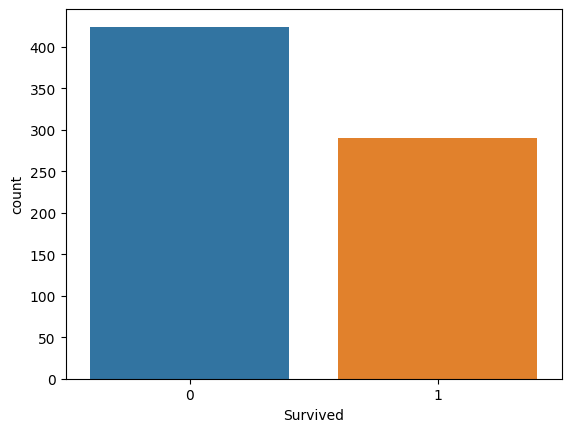

In [36]:
df3['Survived'].value_counts()

ax = sns.countplot(data=df3, x='Survived')

In [ ]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

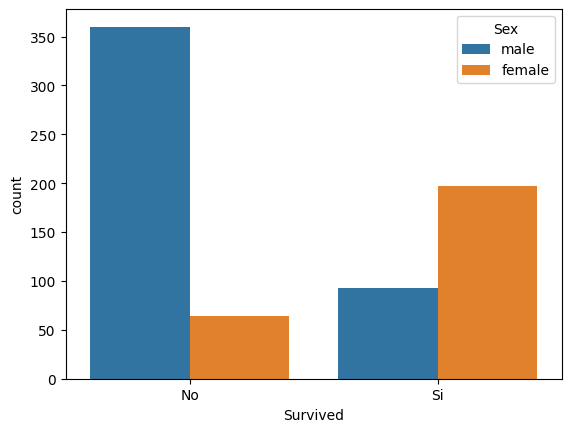

In [37]:
ax = sns.countplot(x=df3['Survived'].replace({0: 'No', 1: 'Si'}), hue=df3['Sex'])

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot

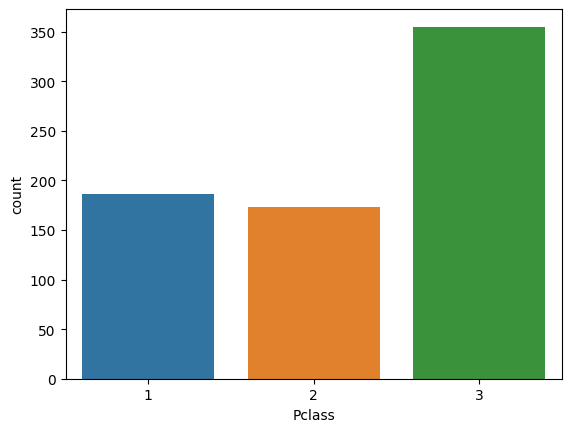

In [38]:
ax = sns.countplot(data=df3, x='Pclass')

In [ ]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

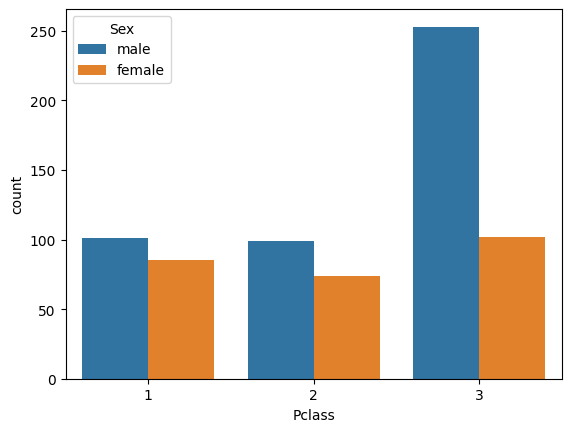

In [39]:
ax = sns.countplot(data=df3, x='Pclass', hue='Sex')

#### Transformar variables categóricas texto a clases numeradas

In [40]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

In [41]:
df_cod = df3.copy()

In [ ]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

In [42]:
le = LabelEncoder()
label_encoding = le.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoding
df_cod.head()

,Pclass,Sex,Parch,Survived,Age,SibSp
0,3,1,0,0,22.0,1
1,1,0,0,1,38.0,1
2,3,0,0,1,26.0,0
3,1,0,0,1,35.0,1
4,3,1,0,0,35.0,0


In [ ]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

In [43]:
le.classes_

array(['female', 'male'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [ ]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

In [44]:
x = df_cod.drop('Survived', axis=1).values
y = df_cod['Survived'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [45]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5, max_depth=6, criterion='gini', random_state = 0)
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.786046511627907

In [ ]:
# Alumno, dibujar la matriz de confusion

<function matplotlib.pyplot.show(close=None, block=None)>

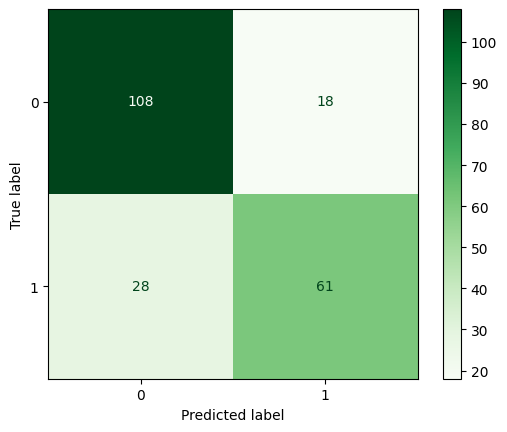

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Greens)
plt.show

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [ ]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

In [ ]:
Pclass = 2
Sex = 'female'
Age = 19
SibSp = 1
Parch = 0


sex_encoded = int(le.transform([Sex]))
x_prueba = np.array([Pclass, sex_encoded, Age, SibSp, Parch])
x_prueba = x_prueba.reshape(1, -1)
y_prueba = clf.predict(x_prueba)

if y_prueba == 1:
  print('todo salio bien para mi')
else:
  print('ya parti a mejor vida')



from sklearn import tree
estimator = clf.estimators_[0]
feature_names = df_cod.drop('Survived', axis=1).columns
class_names = ['Not survived', 'Survived']

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot()
tree.plot_tree(estimator,
               feature_names = feature_names,
               class_names=class_names,
               filled = True, ax=ax);

plt.show()
filename = 'the titanic.png'
fig.savefig(filename)




todo salio bien para mi
